In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Access the dataset from Google Drive
train_data_path = '/content/gdrive/MyDrive/fyp Flood /Flood Dataset-20240206T152545Z-001/Flood Dataset/train_data.csv'
test_data_path = '/content/gdrive/MyDrive/fyp Flood /Flood Dataset-20240206T152545Z-001/Flood Dataset/test_data.csv'

# Load the data into DataFrames
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [ ]:
# Split the data into features and target variable
X_train = train_data.drop('Flood_Occurrence', axis=1)
y_train = train_data['Flood_Occurrence']

In [ ]:
# Handle class imbalance using Synthetic Minority Over-sampling Technique (SMOTE)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)

In [ ]:

# Build a simple neural network model
model = Sequential([
    Dense(units=1, input_dim=X_train_scaled.shape[1], activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train_resampled, epochs=100, batch_size=64)

# Save the TensorFlow model
model.save('/content/gdrive/MyDrive/fyp Flood /Flood Dataset-20240206T152545Z-001/Flood Dataset/neural_network_model.h5')


Epoch 1/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8519
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.8519
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8519
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8519
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8519
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8519
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8519
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8519
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8519
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8519
Epoch 11/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('/content/gdrive/MyDrive/fyp Flood /Flood Dataset-20240206T152545Z-001/Flood Dataset/neural_network_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
# Load the test data
X_test = test_data.drop('Flood_Occurrence', axis=1)
y_test = test_data['Flood_Occurrence']

# Standardize the test features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Print the evaluation metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 [==============================] - 0s 4ms/step - loss: 0.3615 - accuracy: 0.8200
Test Loss: 0.3615292012691498
Test Accuracy: 0.8199999928474426


In [ ]:
# Predict with the original model
predictions = model.predict(X_test_scaled)

# Convert the predictions to binary (0 or 1)
binary_predictions = (predictions >= 0.5).astype(int)

7/7 [==============================] - 0s 2ms/step


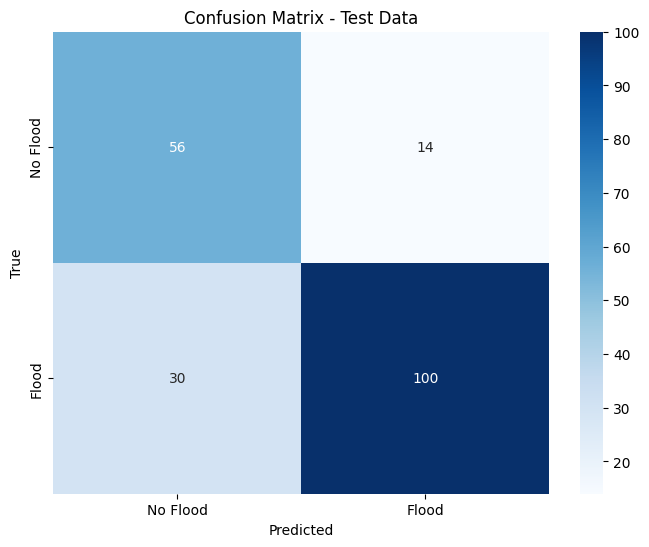

In [ ]:
# Calculate confusion matrix, precision, recall, and F1-score
conf_matrix_test = confusion_matrix(y_test, binary_predictions)
precision_test = precision_score(y_test, binary_predictions)
recall_test = recall_score(y_test, binary_predictions)
f1_test = f1_score(y_test, binary_predictions)



# Plot the confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=["No Flood", "Flood"], yticklabels=["No Flood", "Flood"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Test Data")
plt.show()


36/36 [==============================] - 0s 1ms/step


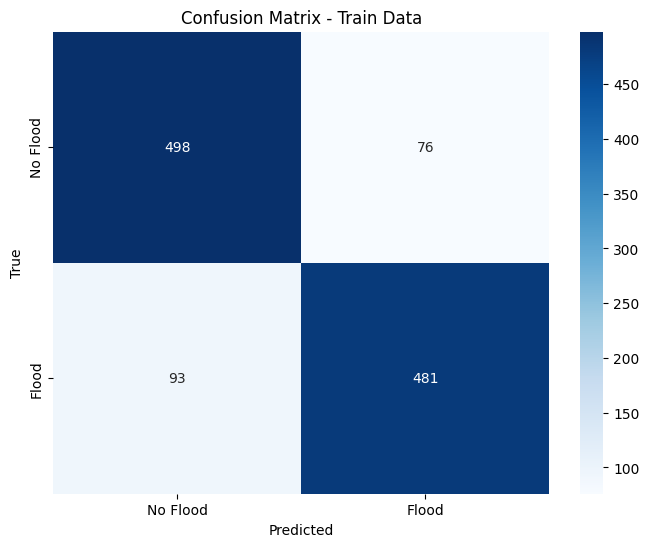

In [ ]:

# Predict with the model on the train data
predictions_train = model.predict(X_train_scaled)

# Convert the predictions to binary (0 or 1)
binary_predictions_train = (predictions_train >= 0.5).astype(int)

# Calculate confusion matrix, precision, recall, and F1-score for train data
conf_matrix_train = confusion_matrix(y_train_resampled, binary_predictions_train)
precision_train = precision_score(y_train_resampled, binary_predictions_train)
recall_train = recall_score(y_train_resampled, binary_predictions_train)
f1_train = f1_score(y_train_resampled, binary_predictions_train)


# Plot the confusion matrix for train data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", xticklabels=["No Flood", "Flood"], yticklabels=["No Flood", "Flood"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Train Data")
plt.show()

In [ ]:
# Print the classification report (Original Model)
class_report_original = classification_report(y_test, binary_predictions, target_names=["No Flood", "Flood"])
print("Classification Report (Original Model):\n", class_report_original)

Classification Report (Original Model):
               precision    recall  f1-score   support

    No Flood       0.65      0.80      0.72        70
       Flood       0.88      0.77      0.82       130

    accuracy                           0.78       200
   macro avg       0.76      0.78      0.77       200
weighted avg       0.80      0.78      0.78       200



In [ ]:

# Convert the input data for TensorFlow Lite
input_data = np.array([[6.08908566, 21.0330808, 1.344351294]])
input_data_scaled = scaler.transform(input_data)
input_data_tflite = np.array(input_data_scaled, dtype=np.float32)

# Load the TensorFlow Lite model and make predictions
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_tensor_index = interpreter.get_input_details()[0]['index']
output = interpreter.tensor(interpreter.get_output_details()[0]['index'])

interpreter.set_tensor(input_tensor_index, input_data_tflite)
interpreter.invoke()

# Print the TensorFlow Lite model prediction
tflite_prediction = output()[0]
print("Flood (TFLite):", "Yes" if tflite_prediction >= 0.5 else "No")
print(f"Model Accuracy Level (Test Data): {test_accuracy}")

Flood (TFLite): No
Model Accuracy Level (Test Data): 0.8199999928474426


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
